In [6]:
import numpy as np
import pandas as pd
import math
from graphviz import Digraph

Mounting the drive to access files in MyDrive

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Loading the dataset from the drive using pandas

In [8]:
dataset=pd.read_csv('/content/drive/MyDrive/tennis.csv')
print(dataset)
#testingdataset=pd.read_csv('/content/drive/MyDrive/Testingdata.csv')

     outlook  temp humidity    wind play
0      Sunny   Hot     High    Weak   No
1      Sunny   Hot     High  Strong   No
2   Overcast   Hot     High    Weak  Yes
3       Rain  Mild     High    Weak  Yes
4       Rain  Cool   Normal    Weak  Yes
5       Rain  Cool   Normal  Strong   No
6   Overcast  Cool   Normal  Strong  Yes
7      Sunny  Mild     High    Weak   No
8      Sunny  Cool   Normal    Weak  Yes
9       Rain  Mild   Normal    Weak  Yes
10     Sunny  Mild   Normal  Strong  Yes
11  Overcast  Mild     High  Strong  Yes
12  Overcast   Hot   Normal    Weak  Yes
13      Rain  Mild     High  Strong   No


In [9]:
len(dataset)#gives the no of instances in dataset
rows=len(dataset.axes[0])#Gives the output same as length (No of rows in DataFrame)
coloumns=len(dataset.axes[1])#No of rows in DataFrame
print(rows)
print(coloumns)

14
5


'iloc' is used to select a portion of dataframe (that may be few rows or coloumns)

SYNTAX: Dataframe.iloc[rowstartindex:endindex,colstartindex:endindex]

Unique function is used to identify unique elements in dataframe

In [10]:
ClassAttributes=dataset.iloc[:,-1].unique() #Identifying the unique values in the class attribute(i.e last attribute)
ClassAttributes

array(['No', 'Yes'], dtype=object)

In [11]:
def Entrophy(x):
  ##Implementing with Numpy Arrays
  unique_values,counts=np.unique(x.iloc[:,-1], return_counts=True)
  #print(unique_values)
  probability=counts/len(x)
  return -np.sum(probability*np.log2(probability))

In [12]:
Entrophy(dataset)

0.9402859586706311

In [13]:
def InformationGain(x,attribute):
  #print(attribute)
  uniquefeatures=attribute.unique()
  #print(uniquefeatures)
  #print(attribute.name)
  TotalEntrophy=Entrophy(x)
  infogain=0
  for i in uniquefeatures:
    subdataset=x[x[attribute.name]==i]
    infogain=infogain+len(subdataset)/len(x)*Entrophy(subdataset)
  INFORMATIONGAIN=TotalEntrophy-infogain
  return INFORMATIONGAIN
    

In [14]:
InformationGain(dataset,dataset['play'])

0.9402859586706311

In [15]:
class Node:
  def __init__(self,name):
    self.name=name
    self.childrens=[]
    self.labels=[]
  def add_children(self,children):
    #APPENDING  CHILDREN NODE OBJECTS(not name ) TO THE PARENT NODE
    self.childrens.append(children)
  def add_label(self,label):
    #APPENDING   EDGE LABELS TO THE PARENT NODE
    self.labels.append(label)
  


    

In [16]:
class Tree:
  def __init__(self,graph):
    #Initiliasing the Digraph object to construct a single tree at last 
    self.graph=graph
  def CreateNodes(self,nodeobj):
    #this function is used to create a node in the graph using Digraph module
    self.graph.node(nodeobj.name)
    #Recursively calling the same function to create nodes for the subtree also
    for i in nodeobj.childrens:
      self.CreateNodes(i)
  def CreateEdge(self,nodeobj):
    for i in range(len(nodeobj.childrens)):
       #this function is used to create a edge in the graph using edge function from  Digragh module
      self.graph.edge(nodeobj.name,nodeobj.childrens[i].name,label=nodeobj.labels[i])
       #Recursively calling the same function to create edgess for the subtree also
      self.CreateEdge(nodeobj.childrens[i])
    return self.graph
  
  
    

  

In [17]:
class DecisionTree:
  def __init__(self,dataset):
    self.iteration=0
    self.dataset=dataset
    self.Node=None
    self.p=0
    self.count=0
  def RootNode(self,dataset,Node1):
    if dataset.empty:
      return
    #if there is only 1 coloumn in the dataset return
    if(len(dataset.axes[1])==1):
      return
    #To get all the  coloumn names of the dataset 
    coloumnnames=list(dataset.columns)
    #extracting the unique values of the last attribute i.e class attribute
    classvar=dataset[coloumnnames[-1]].unique()
    #if there is 1 only 1 class variable that is yes or no then we can stop and create a node with that variable
    if len(classvar)==1:
      print("Child Nodes=",classvar[0])
      #Creating a leaf node
      Node2=Node(classvar[0]+'('+str(self.count)+')')
      self.count=self.count+1
      #Adding this node as a children to its previous node
      Node1.add_children(Node2)
      Node1=Node2
      return
    InfoGain=[]
    #finding information gain of all attributes in the dataset
    for i in dataset:
      InfoGain.append(InformationGain(dataset,dataset[i]))
    InfoGain.pop(-1)#Removing the class attribute info gain
    array=np.array(InfoGain)
    #print(array)
    max=array.argmax()
    #Finding the attribute which has maximum info gain
    RootNode=coloumnnames[max]
    if(self.p==0):
      Node1.name=RootNode
      self.Node=Node1
      self.p=1
    else:
      #creating a new root node in the next level
      Node2=Node(RootNode)
      Node1.add_children(Node2)
      Node1=Node2
    print("RootNode=",RootNode)
    uniquevalues=self.dataset[RootNode].unique()
    #print(uniquevalues)
    #Calling recursively  the same function for the subdataset
    for i in uniquevalues:
      subdataset=dataset[dataset[RootNode]==i]
      Node1.add_label(i)
      #print("sub0=",subdataset)
      subdataset.drop(RootNode, axis=1, inplace=True)
      #print(subdataset)
      if(len(subdataset)==1):
        return
      #print("sub1=",subdataset)
      subdataset=pd.DataFrame(subdataset)
      self.RootNode(subdataset,Node1)



  


RootNode= outlook
RootNode= humidity
Child Nodes= No
Child Nodes= Yes
Child Nodes= Yes
RootNode= wind
Child Nodes= Yes
Child Nodes= No


/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


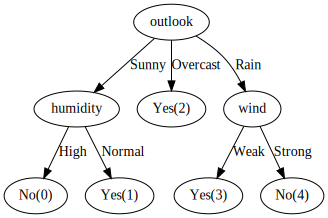

In [18]:
x=DecisionTree(dataset)
y=Digraph()
n=Node("Root")
x.RootNode(dataset,n)
final=Tree(y)
final.CreateNodes(n)
final.CreateEdge(n)


Predict Function is to predict the Class Variables of the Testing Data.The desicion is made by traversing the tree according to the input

In [106]:
def Predict(data,n):
  x=data[n.name]
  for j in range(len(n.labels)):
      if(n.labels[j]==x):
        if(len(n.childrens[j].labels)==0):
          print(n.childrens[j].name)
          return
        Predict(data,n.childrens[j])
        return



In [104]:
data=dataset.to_dict(orient='records')

In [107]:
for i in data:
  Predict(i,n)

No(0)
No(0)
Yes(2)
Yes(3)
Yes(3)
No(4)
Yes(2)
No(0)
Yes(1)
Yes(3)
Yes(1)
Yes(2)
Yes(2)
No(4)
